### Prodigy Infotech Task 2 
Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data.

#### About Dataset :

- Variable Notes :
* pclass: A proxy for socio-economic status (SES)\
1st = Upper\
2nd = Middle\
3rd = Lower\
* age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5\
* sibsp: The dataset defines family relations in this way...\
Sibling = brother, sister, stepbrother, stepsister\
Spouse = husband, wife (mistresses and fiancés were ignored)\
* parch: The dataset defines family relations in this way...\
Parent = mother, father\
Child = daughter, son, stepdaughter, stepson\
Some children travelled only with a nanny, therefore parch=0 for them.\

dataset used from kaggle.com and here is the reference link of dataset.
https://www.kaggle.com/c/titanic/data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the visualisation style
sns.set(style="whitegrid")


In [2]:
df = pd.read_csv('TitanicDataset.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [7]:
# Fill missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Cabin'].fillna('Unknown', inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

/var/folders/jp/x8kqlf6j49n0px9dfcw96lk80000gn/T/ipykernel_12784/3096325152.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/var/folders/jp/x8kqlf6j49n0px9dfcw96lk80000gn/T/ipykernel_12784/3096325152.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

In [8]:
# Convert categorical variables to category type
df['Sex'] = df['Sex'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')
df['Cabin'] = df['Cabin'].astype('category')


In [10]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Sex'>

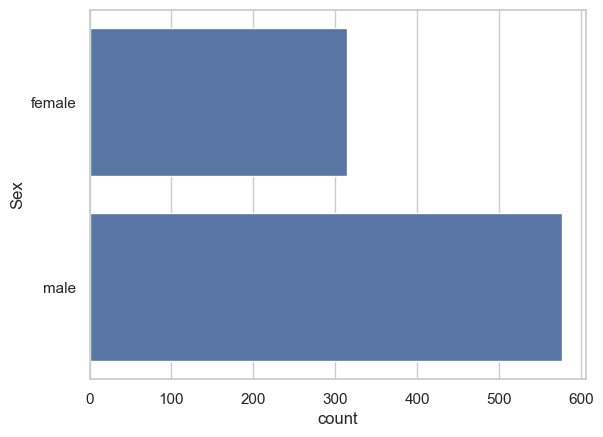

In [11]:
# count plot for "Sex" column
sns.countplot(df['Sex'])

<Axes: xlabel='Sex', ylabel='count'>

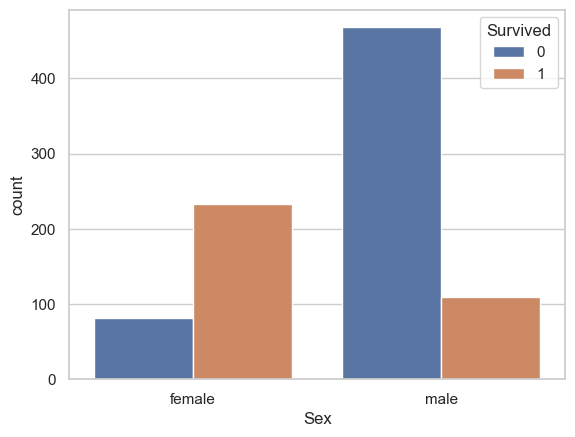

In [12]:
# Analysing Gender wise survivors
sns.countplot(x='Sex', hue='Survived', data=df)

<Axes: xlabel='Pclass', ylabel='count'>

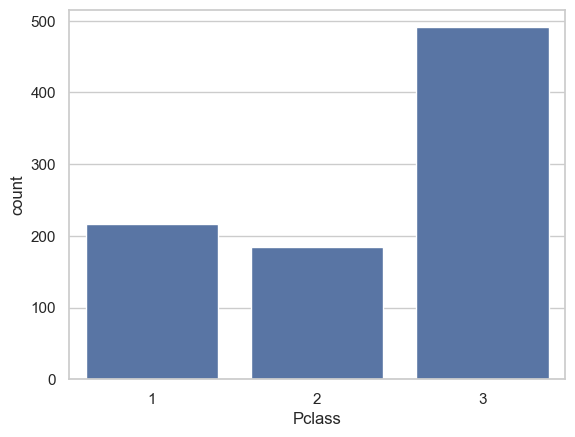

In [13]:
# count plot for "Pclass" column
sns.countplot(x='Pclass', data=df)

<Axes: xlabel='Pclass', ylabel='count'>

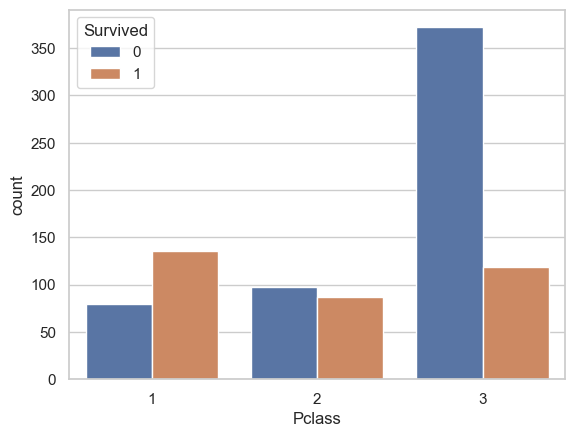

In [14]:
sns.countplot(x='Pclass', hue='Survived', data=df)

In [15]:
df['Embarked'].value_counts() # Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [9]:
#how many survived?
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

/var/folders/jp/x8kqlf6j49n0px9dfcw96lk80000gn/T/ipykernel_12784/2320837835.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




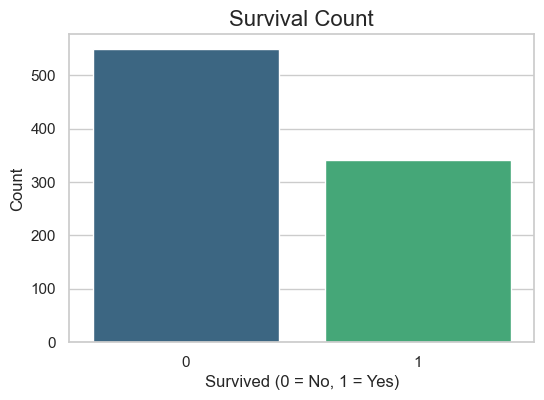

In [31]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=df, palette='viridis')
plt.title('Survival Count', fontsize=16)
plt.xlabel('Survived (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


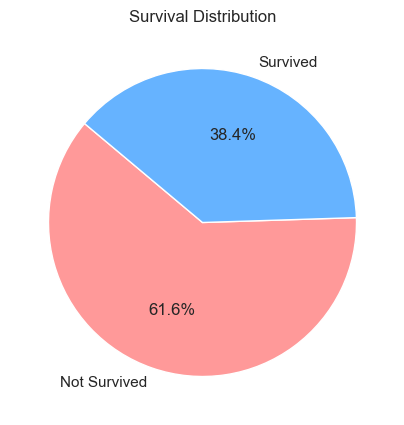

In [32]:
survival_counts = df['Survived'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(survival_counts, labels=['Not Survived', 'Survived'], autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Survival Distribution')
plt.show()
